# TFM - Análisis Completo de Datos Combinados

Este notebook implementa el análisis exploratorio completo para el dataset combinado de restaurantes con reviews del dataset de Yelp.

**Título del TFM**: Análisis de Datos y Procesamiento de Lenguaje Natural para la Extracción de Opiniones y Modelado de Tópicos en Restaurantes: Un Enfoque de Big Data y Ciencia de Datos Aplicado al Estudio Integral del Sector Gastronómico

## Objetivo del Notebook
Realizar un análisis exhaustivo del dataset combinado que:
1. Cargue y explore el dataset de restaurantes con reviews embebidas
2. Analice la información de negocios y su relación con las reviews
3. Examine patrones en calificaciones, popularidad y engagement
4. Implemente capacidades de filtrado por criterios múltiples
5. Genere insights sobre el comportamiento combinado de negocios y reviews

## Estructura de Datos Combinados
El dataset combinado contiene información integrada sobre:
- **Información de negocios**: Ubicación, calificaciones, atributos
- **Reviews embebidas**: Lista completa de reviews por restaurante
- **Métricas agregadas**: Conteos totales y estadísticas derivadas
- **Filtros de calidad**: Datos validados y consistentes

## Características del Análisis
- Análisis integrado de negocios y reviews simultáneamente
- Capacidades de filtrado avanzado por múltiples criterios
- Correlaciones entre métricas de negocio y engagement
- Análisis temporal de patrones de reviews por negocio
- Identificación de negocios con mejor performance
- Visualizaciones combinadas con guardado automático
- Análisis eficiente evitando procesamiento pesado de texto

## 1. Instalación y Configuración

### Librerías Requeridas

Para este análisis completo necesitamos las siguientes librerías principales:

- **pandas**: Manipulación y análisis de datos estructurados
- **numpy**: Cálculos numéricos y estadísticos avanzados
- **matplotlib/seaborn**: Visualizaciones estáticas y análisis gráfico
- **plotly**: Visualizaciones interactivas para exploración
- **datetime**: Manejo y análisis de fechas y patrones temporales
- **collections**: Herramientas para conteo y análisis de datos
- **json**: Procesamiento de estructuras de datos anidadas
- **scipy**: Análisis estadístico avanzado y correlaciones

### Configuración del Entorno

Se configuran las opciones de pandas para mostrar:
- Todas las columnas disponibles sin truncamiento
- Ancho completo del contenido de las celdas
- Formato numérico legible para grandes cantidades
- Configuración para análisis de datos anidados eficiente
- Supresión de warnings para salida limpia

In [1]:
# Instalación de dependencias para análisis completo
# Descomenta la siguiente línea si necesitas instalar las librerías
# !uv add pandas numpy matplotlib seaborn plotly tqdm scipy

In [2]:
# Imports necesarios para el análisis completo de datos combinados
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from collections import Counter
from datetime import datetime, timedelta
import re
from tqdm.auto import tqdm
import warnings
from scipy import stats
import os
warnings.filterwarnings('ignore')

# Configuración de visualización y salida
plt.style.use('seaborn-v0_8')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Crear directorio para guardar figuras
os.makedirs('../../figures/complete_analysis', exist_ok=True)

print("Configuración completada exitosamente")
print(f"Versión de pandas: {pd.__version__}")
print(f"Versión de numpy: {np.__version__}")
print("Directorio de figuras creado: ../../figures/complete_analysis/")

Configuración completada exitosamente
Versión de pandas: 2.3.0
Versión de numpy: 2.2.6
Directorio de figuras creado: ../../figures/complete_analysis/


## 2. Carga de Datos Combinados

### Archivo de Entrada

Cargaremos el archivo de datos combinados que contiene:
- **Información completa de negocios** (ubicación, atributos, calificaciones)
- **Reviews embebidas** por cada restaurante con métricas de engagement
- **Datos agregados** como conteos totales y estadísticas derivadas
- **Estructura anidada** que permite análisis integrado

### Estructura Esperada del Dataset

El archivo JSON debe contener restaurantes con la siguiente estructura combinada:
- `business_id`: Identificador único del negocio (22 caracteres)
- `name`: Nombre del restaurante
- `address`, `city`, `state`, `postal_code`: Ubicación completa
- `latitude`, `longitude`: Coordenadas geográficas
- `stars`: Calificación promedio del negocio (1.0 a 5.0)
- `review_count`: Número de reviews registradas en el negocio
- `is_open`: Estado del negocio (1=abierto, 0=cerrado)
- `attributes`: Diccionario con características del negocio
- `categories`: Categorías de negocio (verificar que sean restaurantes)
- `hours`: Horarios de operación por día de la semana
- `reviews`: Lista de diccionarios con reviews individuales
- `total_reviews`: Conteo total de reviews incluidas

### Rutas de Búsqueda

El notebook intentará cargar el archivo desde múltiples ubicaciones:
1. `../../data/processed/restaurants_with_reviews.json` (desde notebooks/)
2. `../data/processed/restaurants_with_reviews.json` (desde data-analysis/)
3. `data/processed/restaurants_with_reviews.json` (desde raíz del proyecto)

In [3]:
# Cargar datos combinados de restaurantes con reviews
print("Iniciando carga de datos combinados...")

# Intentar cargar desde diferentes rutas del proyecto
try:
    df_combined = pd.read_json('../../data/processed/restaurants_with_reviews.json')
    print("Datos cargados exitosamente desde '../../data/processed/restaurants_with_reviews.json'")
    ruta_carga = "../../data/processed/restaurants_with_reviews.json"
except:
    try:
        df_combined = pd.read_json('../data/processed/restaurants_with_reviews.json')
        print("Datos cargados exitosamente desde '../data/processed/restaurants_with_reviews.json'")
        ruta_carga = "../data/processed/restaurants_with_reviews.json"
    except:
        try:
            df_combined = pd.read_json('data/processed/restaurants_with_reviews.json')
            print("Datos cargados exitosamente desde 'data/processed/restaurants_with_reviews.json'")
            ruta_carga = "data/processed/restaurants_with_reviews.json"
        except Exception as e:
            print(f"Error al cargar el archivo: {e}")
            print("Por favor, verifica que el archivo existe en alguna de las rutas esperadas")
            raise

print(f"Dataset cargado correctamente: {len(df_combined):,} restaurantes con reviews")
print(f"Ruta utilizada: {ruta_carga}")
print(f"Columnas disponibles: {list(df_combined.columns)}")

Iniciando carga de datos combinados...
Datos cargados exitosamente desde '../../data/processed/restaurants_with_reviews.json'
Dataset cargado correctamente: 52,268 restaurantes con reviews
Ruta utilizada: ../../data/processed/restaurants_with_reviews.json
Columnas disponibles: ['business_id', 'name', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars', 'review_count', 'is_open', 'attributes', 'categories', 'hours', 'reviews', 'total_reviews']


## 3. Exploración Inicial del Dataset Combinado

### Información General

Examinaremos la estructura y características básicas del dataset combinado:
- **Dimensiones del dataset**: Número de restaurantes y columnas
- **Tipos de datos**: Verificación de tipos por columna
- **Valores nulos**: Identificación de campos faltantes
- **Estadísticas básicas**: Resumen de variables numéricas

### Metodología de Exploración

Para cada aspecto del dataset:
- **Información estructural**: Forma, tipos de datos, memoria utilizada
- **Calidad de datos**: Identificación de valores nulos y inconsistencias
- **Muestra de datos**: Visualización de primeras filas para validación
- **Estadísticas descriptivas**: Métricas centrales y de dispersión

### Interpretación Esperada

- **Completitud**: Identificar columnas con alta completitud para análisis
- **Consistencia**: Verificar coherencia en tipos de datos
- **Distribución**: Entender rangos y distribuciones de variables numéricas
- **Estructura anidada**: Validar formato de reviews embebidas

In [4]:
# Exploración inicial del dataset combinado
print("=== INFORMACIÓN GENERAL DEL DATASET ===")
print(f"Forma del dataset: {df_combined.shape}")
print(f"Número de restaurantes: {len(df_combined):,}")
print(f"Número de columnas: {len(df_combined.columns)}")

print("\n=== INFORMACIÓN DE TIPOS DE DATOS ===")
df_combined.info()

print("\n=== PRIMERAS FILAS DEL DATASET ===")
display(df_combined.head())

print("\n=== ÚLTIMAS FILAS DEL DATASET ===")
display(df_combined.tail())

# Análisis de valores nulos
nulls_info = df_combined.isnull().sum()
nulls_percentage = (df_combined.isnull().sum() / len(df_combined)) * 100

null_analysis = pd.DataFrame({
    'Valores_Nulos': nulls_info,
    'Porcentaje': nulls_percentage
})

# Mostrar solo columnas con valores nulos
null_analysis_filtered = null_analysis[null_analysis['Valores_Nulos'] > 0]
if len(null_analysis_filtered) > 0:
    print("\n=== COLUMNAS CON VALORES NULOS ===")
    display(null_analysis_filtered.sort_values('Valores_Nulos', ascending=False))
else:
    print("\n=== No hay valores nulos en el dataset ===")

# Estadísticas básicas de columnas numéricas
print("\n=== ESTADÍSTICAS BÁSICAS DE COLUMNAS NUMÉRICAS ===")
display(df_combined.describe())

=== INFORMACIÓN GENERAL DEL DATASET ===
Forma del dataset: (52268, 16)
Número de restaurantes: 52,268
Número de columnas: 16

=== INFORMACIÓN DE TIPOS DE DATOS ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52268 entries, 0 to 52267
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   business_id    52268 non-null  object 
 1   name           52268 non-null  object 
 2   address        52268 non-null  object 
 3   city           52268 non-null  object 
 4   state          52268 non-null  object 
 5   postal_code    52268 non-null  object 
 6   latitude       52268 non-null  float64
 7   longitude      52268 non-null  float64
 8   stars          52268 non-null  float64
 9   review_count   52268 non-null  int64  
 10  is_open        52268 non-null  int64  
 11  attributes     51703 non-null  object 
 12  categories     52268 non-null  object 
 13  hours          44990 non-null  object 
 14  reviews        522

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,reviews,total_reviews
0,_ab50qdWOk0DdB6XOrBitw,Acme Oyster House,724 Iberville St,New Orleans,LA,70130,29.95,-90.07,4.00,7568,1,"{'RestaurantsTakeOut': 'True', 'Alcohol': ''full_bar'', 'RestaurantsPriceRange2': '2', 'Restaura...","Live/Raw Food, Seafood, Restaurants, Cajun/Creole","{'Monday': '11:0-22:0', 'Thursday': '11:0-22:0', 'Friday': '11:0-22:0', 'Saturday': '11:0-22:0',...","[{'review_id': 'vHLTOsdILT7xgTu7TAWTUQ', 'user_id': '417HF4q8ynnWtuJrkNax_g', 'stars': 5.0, 'dat...",7673
1,ac1AeYqs8Z4_e2X5M3if2A,Oceana Grill,739 Conti St,New Orleans,LA,70130,29.96,-90.07,4.00,7400,1,"{'RestaurantsGoodForGroups': 'True', 'RestaurantsDelivery': 'True', 'RestaurantsPriceRange2': '2...","Restaurants, Seafood, Cajun/Creole, Breakfast & Brunch","{'Monday': '8:0-1:0', 'Tuesday': '8:0-1:0', 'Wednesday': '8:0-1:0', 'Thursday': '8:0-1:0', 'Frid...","[{'review_id': '30ZEEHVp4hcGuoSaaIb-DQ', 'user_id': 'lr8j1QWYLWj0q2ttxesulw', 'stars': 5.0, 'dat...",7516
2,GXFMD0Z4jEVZBCsbPf4CTQ,Hattie B’s Hot Chicken - Nashville,112 19th Ave S,Nashville,TN,37203,36.15,-86.80,4.50,6093,1,"{'RestaurantsGoodForGroups': 'True', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsTakeOut':...","American (Traditional), Chicken Shop, Southern, Restaurants, Chicken Wings, American (New), Soul...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-16:0', 'Wednesday': '11:0-22:0', 'Thursday': '11:0-22:0',...","[{'review_id': 'fyAhL9xaAjW20LgdVMc4uQ', 'user_id': 'x5W4Bw-VJiJGgOPyWxJbAg', 'stars': 4.0, 'dat...",6160
3,ytynqOUb3hjKeJfRj5Tshw,Reading Terminal Market,51 N 12th St,Philadelphia,PA,19107,39.95,-75.16,4.50,5721,1,"{'RestaurantsGoodForGroups': 'True', 'RestaurantsPriceRange2': '2', 'Corkage': 'False', 'BikePar...","Candy Stores, Shopping, Department Stores, Fast Food, Beer, Wine & Spirits, Fruits & Veggies, Ch...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', 'Wednesday': '8:0-18:0', 'Thursday': '8:0-18:0', '...","[{'review_id': 'kKC5pBPkUCWo6mKYFUewRw', 'user_id': 'mGnZFbk2gqLLtGW-mYo__A', 'stars': 5.0, 'dat...",5778
4,oBNrLz4EDhiscSlbOl8uAw,Ruby Slipper - New Orleans,200 Magazine St,New Orleans,LA,70130,29.95,-90.07,4.50,5193,1,"{'NoiseLevel': ''loud'', 'Caters': 'False', 'BikeParking': 'True', 'BusinessParking': '{'garage'...","Restaurants, American (Traditional), American (New), Cafes, Breakfast & Brunch","{'Monday': '0:0-0:0', 'Tuesday': '7:30-14:0', 'Wednesday': '7:30-14:0', 'Thursday': '7:30-14:0',...","[{'review_id': 'uY_zjT_h18ikwlRn7GTvzQ', 'user_id': 'Egji_XwjS4dykCjk8qoZWw', 'stars': 4.0, 'dat...",5264



=== ÚLTIMAS FILAS DEL DATASET ===


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,reviews,total_reviews
52263,D_qCYxSUz6XJag_UzFe5wA,Hibachi Express Tarpon Springs,41260 US Hwy 19 N,Tarpon Springs,FL,34689,28.15,-82.74,4.50,5,1,None,"Sushi Bars, Restaurants, Japanese",None,"[{'review_id': 'sfG9UCj7j3ZuAt2jgkDuvA', 'user_id': 'votKnZJgysMDFssRXwgBkA', 'stars': 5.0, 'dat...",5
52264,P2ZNB33FRQBdfKYGeS8irw,Flava Cafe,8307 118 Ave NW,Edmonton,AB,T5B 0S4,53.57,-113.47,5.00,5,1,"{'RestaurantsTableService': 'False', 'RestaurantsDelivery': 'True', 'RestaurantsTakeOut': 'True'}","Restaurants, Caribbean, Cafes",None,"[{'review_id': 'rFGHFbJP7tXZ48bb9tdBNw', 'user_id': 'G9lPd-n4el3nKeFtRHFsKA', 'stars': 5.0, 'dat...",5
52265,HTToomBjtjb-Mf6wESh8TA,Best For Less Jamaican Jerk,11618 N 22nd St,Tampa,FL,33612,28.05,-82.43,3.50,5,1,"{'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet...","Restaurants, Caribbean, American (Traditional), Barbeque","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0', 'Wednesday': '11:0-23:0', 'Thursday': '11:0-23:0...","[{'review_id': 'AZYF2_WoQucWX1jZLb63hg', 'user_id': 'X9Y96NY5nmqzNlMHRE2tGw', 'stars': 2.0, 'dat...",5
52266,Gs43rBxzv6hwYoIp-FxVcg,Starbucks Gate F,"4100 George J Bean Pkwy, Ste 2400",Tampa,FL,33607,27.98,-82.54,4.00,5,1,"{'RestaurantsDelivery': 'True', 'BusinessParking': '{'garage': False, 'street': False, 'validate...","Food, Breakfast & Brunch, Coffee & Tea, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'Wednesday': '0:0-0:0', 'Thursday': '0:0-0:0', 'Frid...","[{'review_id': '8rvZDisgSdie_hJSfetwOQ', 'user_id': 'dH5621mQHTMNRfJO7-s03Q', 'stars': 4.0, 'dat...",5
52267,kwxHDNF7MQ9kHd4F7PHCfw,SoBol Yardley,25 S Main St,Yardley,PA,19067,40.24,-74.84,4.00,5,1,"{'HasTV': 'False', 'WheelchairAccessible': 'True', 'RestaurantsReservations': 'False', 'Business...","Acai Bowls, Restaurants, Cafes, Food, Juice Bars & Smoothies","{'Monday': '0:0-0:0', 'Tuesday': '8:30-18:30', 'Wednesday': '8:30-18:30', 'Thursday': '8:30-18:3...","[{'review_id': '7WYoymVa-fM45h2HWZYT4A', 'user_id': '0JYjpPCUuAfE1rMtnM9bgQ', 'stars': 5.0, 'dat...",5



=== COLUMNAS CON VALORES NULOS ===


,Valores_Nulos,Porcentaje
hours,7278,13.92
attributes,565,1.08



=== ESTADÍSTICAS BÁSICAS DE COLUMNAS NUMÉRICAS ===


,latitude,longitude,stars,review_count,is_open,total_reviews
count,52268.00,52268.00,52268.00,52268.00,52268.00,52268.00
mean,37.00,-87.84,3.52,87.27,0.67,90.39
std,6.01,13.81,0.83,188.94,0.47,193.94
min,27.56,-120.08,1.00,5.00,0.00,5.00
25%,32.22,-90.23,3.00,13.00,0.00,14.00
50%,39.48,-86.04,3.50,33.00,1.00,34.00
75%,39.96,-75.34,4.00,89.00,1.00,92.00
max,53.68,-74.66,5.00,7568.00,1.00,7673.00


## 4. Análisis de Información de Negocios

### Distribución Geográfica

Analizaremos la distribución geográfica de los restaurantes:
- **Distribución por estados**: Top estados con más restaurantes
- **Distribución por ciudades**: Ciudades con mayor concentración
- **Patrones de ubicación**: Clusters geográficos principales

### Análisis de Calificaciones y Popularidad

Examinaremos las métricas de calidad y popularidad:
- **Distribución de calificaciones**: Análisis de ratings por estrellas
- **Popularidad por reviews**: Restaurantes con más reviews
- **Correlaciones**: Relación entre calificaciones y número de reviews

### Verificación de Categorías

Validaremos que todos los negocios sean restaurantes:
- **Análisis de categorías**: Verificar filtrado correcto
- **Tipos de restaurantes**: Diversidad en subcategorías
- **Consistencia**: Validar que no hay negocios no-gastronómicos

=== ANÁLISIS GEOGRÁFICO ===

Top 10 estados con más restaurantes:


state
PA    12641
FL     8731
TN     4352
MO     4247
IN     4150
LA     3640
NJ     3341
AZ     2671
AB     2410
NV     1673
Name: count, dtype: int64

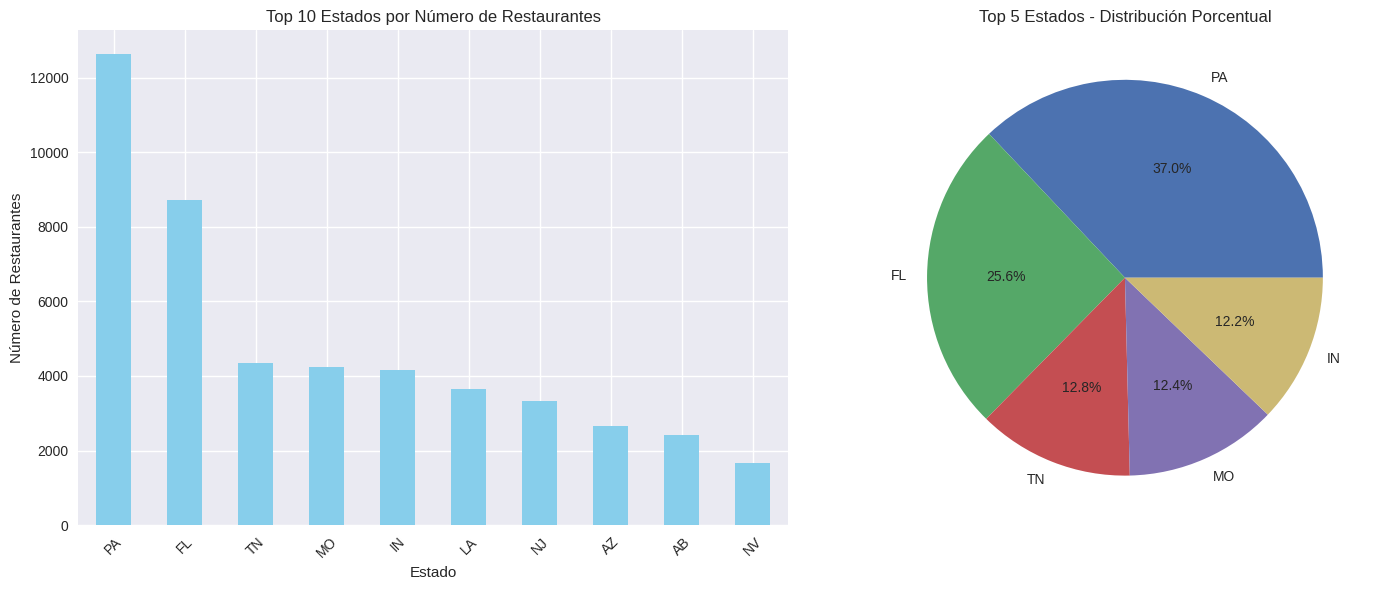


Top 10 ciudades con más restaurantes:


city
Philadelphia    5852
Tampa           2960
Indianapolis    2862
Nashville       2502
Tucson          2466
New Orleans     2259
Edmonton        2166
Saint Louis     1790
Reno            1286
Boise            847
Name: count, dtype: int64

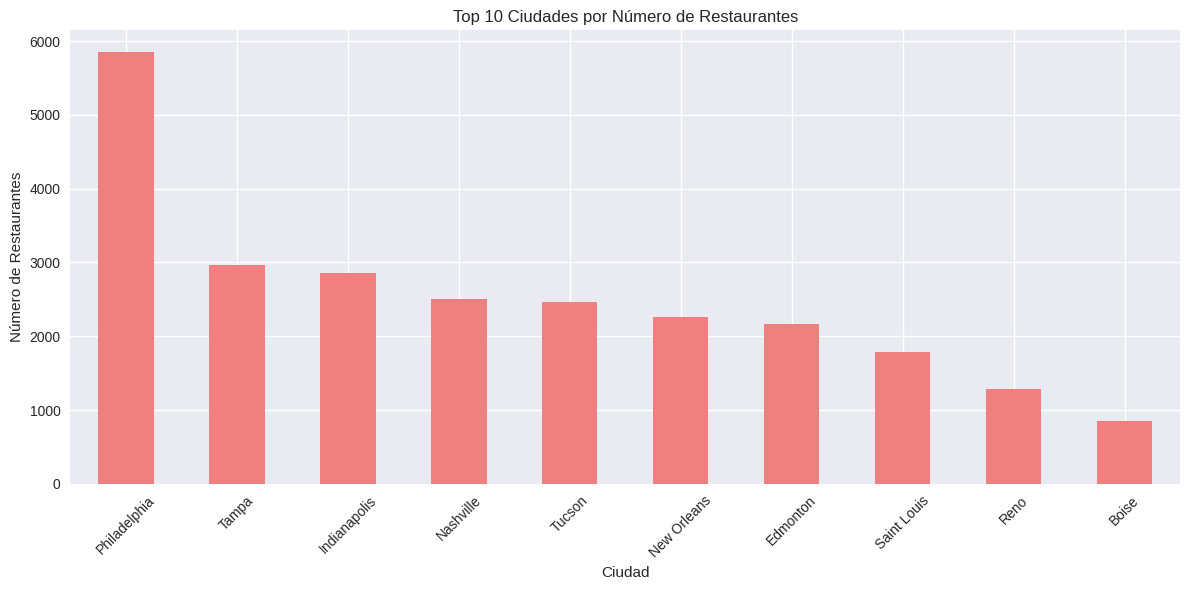


=== ANÁLISIS DE CALIFICACIONES ===

Distribución de calificaciones por estrellas:


stars
1.00      247
1.50     1481
2.00     2909
2.50     4850
3.00     7639
3.50    11794
4.00    13438
4.50     8357
5.00     1553
Name: count, dtype: int64


Estadísticas de calificaciones:
Promedio: 3.52
Mediana: 3.50
Desviación estándar: 0.83
Mínimo: 1.0
Máximo: 5.0


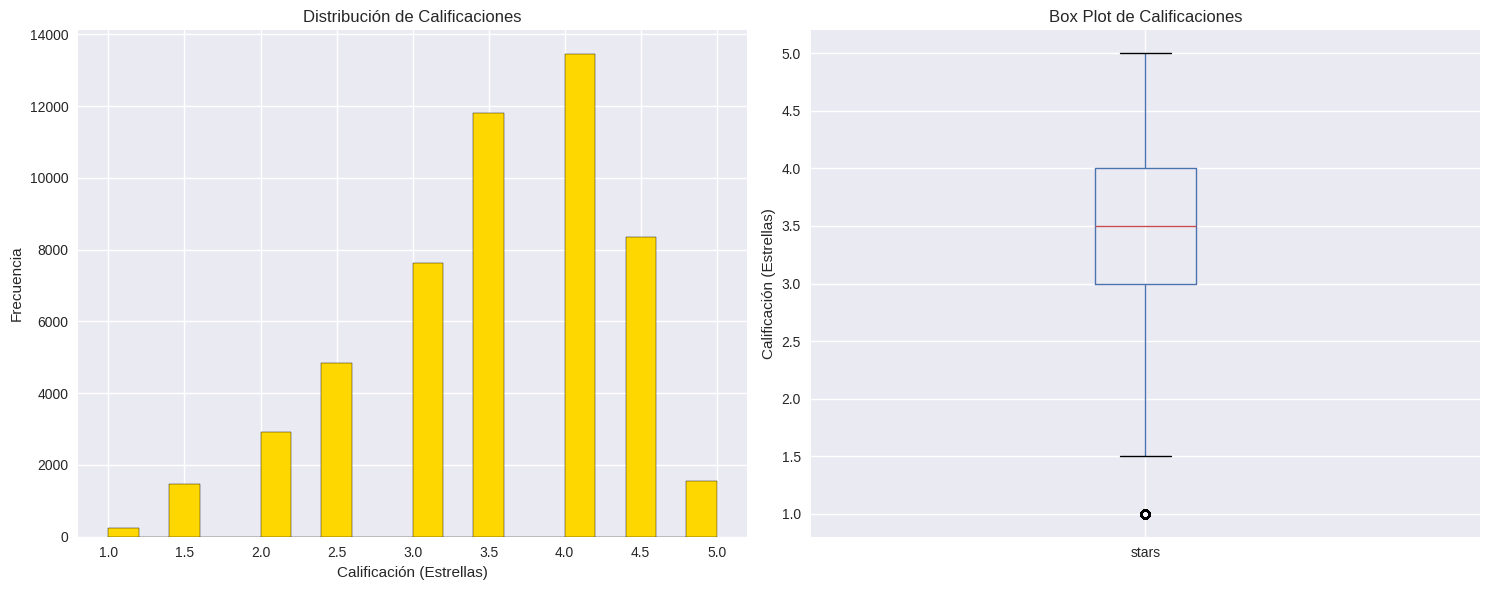

In [5]:
# Análisis de distribución geográfica
print("=== ANÁLISIS GEOGRÁFICO ===")

# Distribución por estados
if 'state' in df_combined.columns:
    print("\nTop 10 estados con más restaurantes:")
    top_states = df_combined['state'].value_counts().head(10)
    display(top_states)
    
    # Visualización de distribución por estados
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Gráfico de barras
    top_states.plot(kind='bar', ax=ax1, color='skyblue')
    ax1.set_title('Top 10 Estados por Número de Restaurantes')
    ax1.set_xlabel('Estado')
    ax1.set_ylabel('Número de Restaurantes')
    ax1.tick_params(axis='x', rotation=45)
    
    # Gráfico de pastel
    top_states.head(5).plot(kind='pie', ax=ax2, autopct='%1.1f%%')
    ax2.set_title('Top 5 Estados - Distribución Porcentual')
    ax2.set_ylabel('')
    
    plt.tight_layout()
    plt.savefig('../../figures/complete_analysis/distribucion_estados.png', dpi=300, bbox_inches='tight')
    plt.show()

# Distribución por ciudades
if 'city' in df_combined.columns:
    print("\nTop 10 ciudades con más restaurantes:")
    top_cities = df_combined['city'].value_counts().head(10)
    display(top_cities)
    
    # Visualización de ciudades
    plt.figure(figsize=(12, 6))
    top_cities.plot(kind='bar', color='lightcoral')
    plt.title('Top 10 Ciudades por Número de Restaurantes')
    plt.xlabel('Ciudad')
    plt.ylabel('Número de Restaurantes')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('../../figures/complete_analysis/distribucion_ciudades.png', dpi=300, bbox_inches='tight')
    plt.show()

print("\n=== ANÁLISIS DE CALIFICACIONES ===")

# Distribución de calificaciones
if 'stars' in df_combined.columns:
    print("\nDistribución de calificaciones por estrellas:")
    stars_dist = df_combined['stars'].value_counts().sort_index()
    display(stars_dist)
    
    # Estadísticas de calificaciones
    print(f"\nEstadísticas de calificaciones:")
    print(f"Promedio: {df_combined['stars'].mean():.2f}")
    print(f"Mediana: {df_combined['stars'].median():.2f}")
    print(f"Desviación estándar: {df_combined['stars'].std():.2f}")
    print(f"Mínimo: {df_combined['stars'].min():.1f}")
    print(f"Máximo: {df_combined['stars'].max():.1f}")
    
    # Visualización de distribución de calificaciones
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Histograma
    df_combined['stars'].hist(bins=20, ax=ax1, color='gold', edgecolor='black')
    ax1.set_title('Distribución de Calificaciones')
    ax1.set_xlabel('Calificación (Estrellas)')
    ax1.set_ylabel('Frecuencia')
    
    # Box plot
    df_combined.boxplot(column='stars', ax=ax2)
    ax2.set_title('Box Plot de Calificaciones')
    ax2.set_ylabel('Calificación (Estrellas)')
    
    plt.tight_layout()
    plt.savefig('../../figures/complete_analysis/distribucion_calificaciones.png', dpi=300, bbox_inches='tight')
    plt.show()


=== ANÁLISIS DE POPULARIDAD ===

Top 10 restaurantes con más reviews:


,name,city,state,review_count,stars
0,Acme Oyster House,New Orleans,LA,7568,4.00
1,Oceana Grill,New Orleans,LA,7400,4.00
2,Hattie B’s Hot Chicken - Nashville,Nashville,TN,6093,4.50
3,Reading Terminal Market,Philadelphia,PA,5721,4.50
4,Ruby Slipper - New Orleans,New Orleans,LA,5193,4.50
5,Mother's Restaurant,New Orleans,LA,5185,3.50
6,Royal House,New Orleans,LA,5070,4.00
7,Commander's Palace,New Orleans,LA,4876,4.50
8,Luke,New Orleans,LA,4554,4.00
9,Cochon,New Orleans,LA,4421,4.00



Estadísticas de número de reviews:
Promedio: 87.27
Mediana: 33.00
Desviación estándar: 188.94
Mínimo: 5
Máximo: 7568

Correlación entre calificación y número de reviews: 0.155


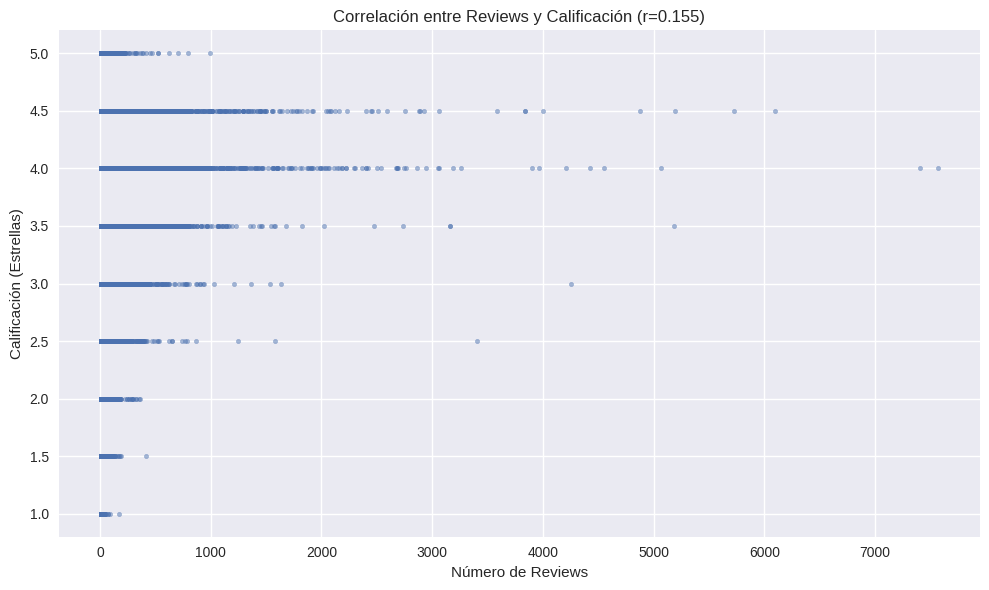


=== VERIFICACIÓN DE CATEGORÍAS ===

Verificando que todos los negocios sean restaurantes...
Registros con categorías: 52,268 (100.0%)

Top 10 categorías más comunes:
  Restaurants: 52,268
  Food: 15,472
  Nightlife: 8,723
  Sandwiches: 8,366
  Bars: 8,337
  American (Traditional): 8,139
  Pizza: 7,093
  Fast Food: 6,472
  Breakfast & Brunch: 6,239
  American (New): 6,097

Categorías relacionadas con restaurantes: 125,490
Porcentaje de validación: 51.5%

=== ANÁLISIS DE ESTADO DE NEGOCIOS ===

Estado de los negocios:
Abiertos (1): 34,987
Cerrados (0): 17,281


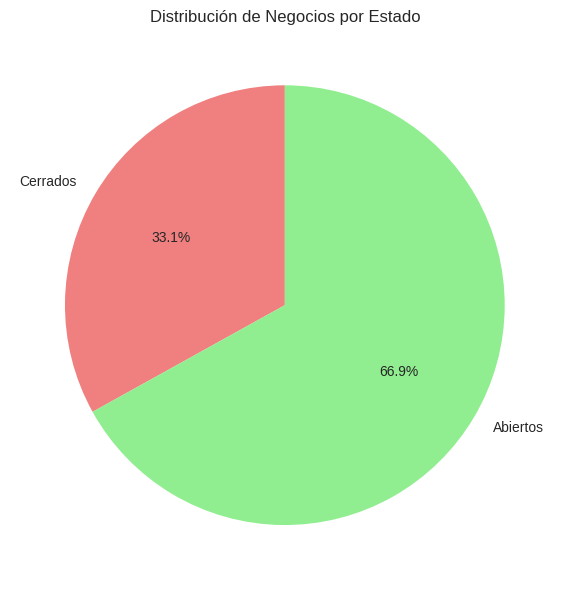

In [6]:
# Análisis de popularidad por reviews
print("\n=== ANÁLISIS DE POPULARIDAD ===")

if 'review_count' in df_combined.columns:
    print("\nTop 10 restaurantes con más reviews:")
    top_reviewed = df_combined.nlargest(10, 'review_count')[['name', 'city', 'state', 'review_count', 'stars']]
    display(top_reviewed)
    
    # Estadísticas de número de reviews
    print(f"\nEstadísticas de número de reviews:")
    print(f"Promedio: {df_combined['review_count'].mean():.2f}")
    print(f"Mediana: {df_combined['review_count'].median():.2f}")
    print(f"Desviación estándar: {df_combined['review_count'].std():.2f}")
    print(f"Mínimo: {df_combined['review_count'].min()}")
    print(f"Máximo: {df_combined['review_count'].max()}")

# Análisis de correlación entre calificaciones y número de reviews
if 'stars' in df_combined.columns and 'review_count' in df_combined.columns:
    correlation = df_combined['stars'].corr(df_combined['review_count'])
    print(f"\nCorrelación entre calificación y número de reviews: {correlation:.3f}")
    
    # Visualización de correlación
    plt.figure(figsize=(10, 6))
    plt.scatter(df_combined['review_count'], df_combined['stars'], alpha=0.5, s=10)
    plt.xlabel('Número de Reviews')
    plt.ylabel('Calificación (Estrellas)')
    plt.title(f'Correlación entre Reviews y Calificación (r={correlation:.3f})')
    plt.tight_layout()
    plt.savefig('../../figures/complete_analysis/correlacion_reviews_calificacion.png', dpi=300, bbox_inches='tight')
    plt.show()

print("\n=== VERIFICACIÓN DE CATEGORÍAS ===")

# Análisis de categorías
if 'categories' in df_combined.columns:
    print("\nVerificando que todos los negocios sean restaurantes...")
    
    # Contar registros con categorías
    has_categories = df_combined['categories'].notna().sum()
    print(f"Registros con categorías: {has_categories:,} ({has_categories/len(df_combined)*100:.1f}%)")
    
    # Análisis de categorías más comunes
    all_categories = []
    for categories in df_combined['categories'].dropna():
        if isinstance(categories, str):
            all_categories.extend([cat.strip() for cat in categories.split(',')])
    
    category_counts = Counter(all_categories)
    print(f"\nTop 10 categorías más comunes:")
    for category, count in category_counts.most_common(10):
        print(f"  {category}: {count:,}")
    
    # Verificar que contienen palabras relacionadas con restaurantes
    restaurant_keywords = ['Restaurant', 'Food', 'Pizza', 'Mexican', 'Italian', 'Chinese', 'Bar', 'Cafe']
    restaurant_related = 0
    
    for keyword in restaurant_keywords:
        restaurant_related += sum(1 for cat in all_categories if keyword.lower() in cat.lower())
    
    print(f"\nCategorías relacionadas con restaurantes: {restaurant_related:,}")
    print(f"Porcentaje de validación: {restaurant_related/len(all_categories)*100:.1f}%")

print("\n=== ANÁLISIS DE ESTADO DE NEGOCIOS ===")

# Análisis de negocios abiertos vs cerrados
if 'is_open' in df_combined.columns:
    open_status = df_combined['is_open'].value_counts()
    print(f"\nEstado de los negocios:")
    print(f"Abiertos (1): {open_status.get(1, 0):,}")
    print(f"Cerrados (0): {open_status.get(0, 0):,}")
    
    # Visualización
    plt.figure(figsize=(8, 6))
    labels = ['Cerrados', 'Abiertos']
    sizes = [open_status.get(0, 0), open_status.get(1, 0)]
    colors = ['lightcoral', 'lightgreen']
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.title('Distribución de Negocios por Estado')
    plt.tight_layout()
    plt.savefig('../../figures/complete_analysis/estado_negocios.png', dpi=300, bbox_inches='tight')
    plt.show()

## 5. Análisis de Reviews Embebidas

### Estructura de Reviews

Analizaremos las reviews embebidas en cada restaurante:
- **Conteo de reviews**: Número total de reviews por restaurante
- **Estructura de datos**: Validación del formato de reviews embebidas
- **Distribución**: Análisis de cómo se distribuyen las reviews

### Métricas de Engagement por Restaurante

Examinaremos las métricas agregadas de engagement:
- **Promedios por restaurante**: Calificaciones promedio y engagement
- **Variabilidad**: Consistencia en calificaciones por restaurante
- **Patrones temporales**: Análisis de fechas de reviews

### Análisis Eficiente (Sin Procesamiento Pesado)

Para evitar sobrecarga computacional:
- **Muestreo inteligente**: Análisis de subconjuntos representativos
- **Métricas agregadas**: Focus en estadísticas resumidas
- **Evitar análisis de texto**: No procesamiento pesado de contenido textual
- **Visualizaciones optimizadas**: Gráficos eficientes con datos agregados

=== ANÁLISIS DE REVIEWS EMBEBIDAS ===

Analizando estructura de reviews embebidas...
Muestra de restaurante: Acme Oyster House en New Orleans
Tipo de datos de reviews: <class 'list'>
Número de reviews en muestra: 7673
Estructura de review individual: <class 'dict'>
Campos en review: ['review_id', 'user_id', 'stars', 'date', 'text', 'useful', 'funny', 'cool']

Total de reviews en el dataset: 4,724,471

Estadísticas de reviews por restaurante:
Promedio: 90.39
Mediana: 34.00
Mínimo: 5
Máximo: 7673


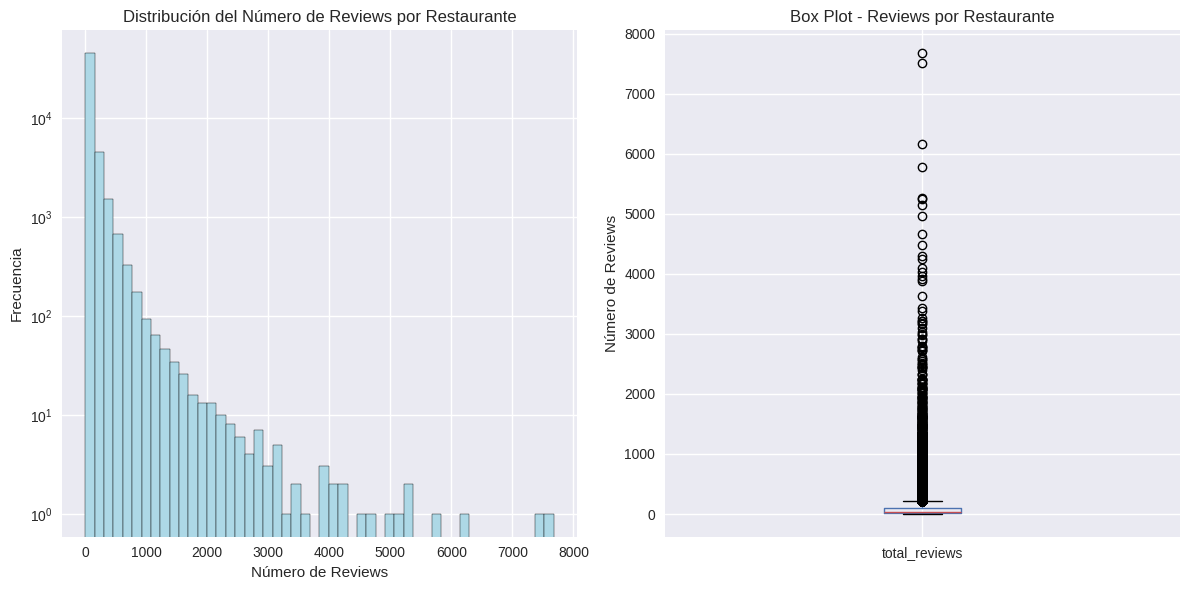


=== ANÁLISIS DE CONSISTENCIA ENTRE MÉTRICAS ===

Comparando métricas de conteo de reviews...
Diferencia promedio entre review_count y total_reviews: 3.12
Diferencia máxima: 128
Correlación entre review_count y total_reviews: 1.000


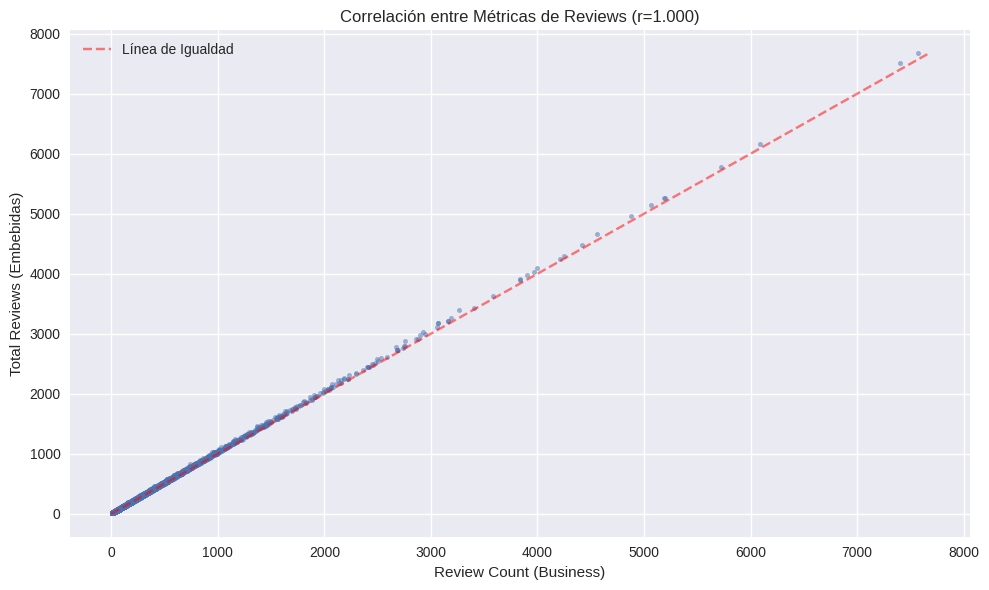


=== ANÁLISIS DE EFICIENCIA DE DATOS ===

Análisis de completitud de campos importantes:
business_id: 100.0% completo
name: 100.0% completo
stars: 100.0% completo
review_count: 100.0% completo
city: 100.0% completo
state: 100.0% completo

Restaurantes con información más completa (top 10):


,name,city,state,stars,review_count,completeness_score
0,Acme Oyster House,New Orleans,LA,4.00,7568,6
1,Oceana Grill,New Orleans,LA,4.00,7400,6
2,Hattie B’s Hot Chicken - Nashville,Nashville,TN,4.50,6093,6
3,Reading Terminal Market,Philadelphia,PA,4.50,5721,6
4,Ruby Slipper - New Orleans,New Orleans,LA,4.50,5193,6
5,Mother's Restaurant,New Orleans,LA,3.50,5185,6
6,Royal House,New Orleans,LA,4.00,5070,6
7,Commander's Palace,New Orleans,LA,4.50,4876,6
8,Luke,New Orleans,LA,4.00,4554,6
9,Cochon,New Orleans,LA,4.00,4421,6


In [8]:
# Análisis de reviews embebidas
print("=== ANÁLISIS DE REVIEWS EMBEBIDAS ===")

# Verificar si existe la columna de reviews
if 'reviews' in df_combined.columns:
    print("\nAnalizando estructura de reviews embebidas...")
    
    # Analizar primer restaurante con reviews
    sample_reviews = None
    for idx, row in df_combined.iterrows():
        reviews_data = row['reviews']
        # Check if reviews_data is not None/NaN and has content
        if reviews_data is not None and not (isinstance(reviews_data, float) and pd.isna(reviews_data)):
            # If it's a list or array, check that it's not empty
            if isinstance(reviews_data, (list, np.ndarray)) and len(reviews_data) > 0:
                sample_reviews = reviews_data
                print(f"Muestra de restaurante: {row['name']} en {row['city']}")
                break
            # If it's a string and has content
            elif isinstance(reviews_data, str) and len(reviews_data) > 10:
                sample_reviews = reviews_data
                print(f"Muestra de restaurante: {row['name']} en {row['city']}")
                break
    
    if sample_reviews:
        print(f"Tipo de datos de reviews: {type(sample_reviews)}")
        
        # Si las reviews están como lista de diccionarios
        if isinstance(sample_reviews, list) and len(sample_reviews) > 0:
            print(f"Número de reviews en muestra: {len(sample_reviews)}")
            sample_review = sample_reviews[0]
            print(f"Estructura de review individual: {type(sample_review)}")
            
            if isinstance(sample_review, dict):
                print(f"Campos en review: {list(sample_review.keys())}")
    
    # Análisis de conteo total de reviews por método disponible
    if 'total_reviews' in df_combined.columns:
        total_reviews_sum = df_combined['total_reviews'].sum()
        print(f"\nTotal de reviews en el dataset: {total_reviews_sum:,}")
        
        # Estadísticas de reviews por restaurante
        print(f"\nEstadísticas de reviews por restaurante:")
        print(f"Promedio: {df_combined['total_reviews'].mean():.2f}")
        print(f"Mediana: {df_combined['total_reviews'].median():.2f}")
        print(f"Mínimo: {df_combined['total_reviews'].min()}")
        print(f"Máximo: {df_combined['total_reviews'].max()}")
        
        # Distribución de reviews por restaurante
        plt.figure(figsize=(12, 6))
        
        # Histograma de distribución
        plt.subplot(1, 2, 1)
        df_combined['total_reviews'].hist(bins=50, color='lightblue', edgecolor='black')
        plt.title('Distribución del Número de Reviews por Restaurante')
        plt.xlabel('Número de Reviews')
        plt.ylabel('Frecuencia')
        plt.yscale('log')  # Escala logarítmica para mejor visualización
        
        # Box plot
        plt.subplot(1, 2, 2)
        df_combined.boxplot(column='total_reviews', ax=plt.gca())
        plt.title('Box Plot - Reviews por Restaurante')
        plt.ylabel('Número de Reviews')
        
        plt.tight_layout()
        plt.savefig('../../figures/complete_analysis/distribucion_reviews_por_restaurante.png', dpi=300, bbox_inches='tight')
        plt.show()

print("\n=== ANÁLISIS DE CONSISTENCIA ENTRE MÉTRICAS ===")

# Comparar review_count vs total_reviews si ambas existen
if 'review_count' in df_combined.columns and 'total_reviews' in df_combined.columns:
    print("\nComparando métricas de conteo de reviews...")
    
    # Calcular diferencias
    df_combined['review_diff'] = abs(df_combined['review_count'] - df_combined['total_reviews'])
    avg_diff = df_combined['review_diff'].mean()
    max_diff = df_combined['review_diff'].max()
    
    print(f"Diferencia promedio entre review_count y total_reviews: {avg_diff:.2f}")
    print(f"Diferencia máxima: {max_diff}")
    
    # Correlación entre métricas
    correlation = df_combined['review_count'].corr(df_combined['total_reviews'])
    print(f"Correlación entre review_count y total_reviews: {correlation:.3f}")
    
    # Visualización de correlación
    plt.figure(figsize=(10, 6))
    plt.scatter(df_combined['review_count'], df_combined['total_reviews'], alpha=0.5, s=10)
    plt.xlabel('Review Count (Business)')
    plt.ylabel('Total Reviews (Embebidas)')
    plt.title(f'Correlación entre Métricas de Reviews (r={correlation:.3f})')
    plt.plot([0, max(df_combined['review_count'].max(), df_combined['total_reviews'].max())], 
             [0, max(df_combined['review_count'].max(), df_combined['total_reviews'].max())], 
             'r--', alpha=0.5, label='Línea de Igualdad')
    plt.legend()
    plt.tight_layout()
    plt.savefig('../../figures/complete_analysis/correlacion_metricas_reviews.png', dpi=300, bbox_inches='tight')
    plt.show()

print("\n=== ANÁLISIS DE EFICIENCIA DE DATOS ===")

# Análisis de completitud de datos
print("\nAnálisis de completitud de campos importantes:")

important_fields = ['business_id', 'name', 'stars', 'review_count', 'city', 'state']
for field in important_fields:
    if field in df_combined.columns:
        completeness = (df_combined[field].notna().sum() / len(df_combined)) * 100
        print(f"{field}: {completeness:.1f}% completo")

# Identificar restaurantes con datos más completos
print(f"\nRestaurantes con información más completa (top 10):")
if all(field in df_combined.columns for field in important_fields):
    # Crear score de completitud
    completeness_score = df_combined[important_fields].notna().sum(axis=1)
    df_combined['completeness_score'] = completeness_score
    
    # Mostrar top restaurantes por completitud y popularidad
    top_complete = df_combined.nlargest(10, ['completeness_score', 'total_reviews'] if 'total_reviews' in df_combined.columns else ['completeness_score', 'review_count'])
    display(top_complete[['name', 'city', 'state', 'stars', 'review_count', 'completeness_score']].head(10))

## 6. Capacidades de Filtrado y Segmentación

### Filtros Disponibles

Implementaremos filtros prácticos para análisis específicos:
- **Filtro geográfico**: Por estado, ciudad o región
- **Filtro de calidad**: Por rango de calificaciones
- **Filtro de popularidad**: Por número mínimo de reviews
- **Filtro de estado**: Solo negocios abiertos/cerrados
- **Filtros combinados**: Múltiples criterios simultáneamente

### Casos de Uso de Filtrado

Ejemplos prácticos de filtrado:
- **Restaurantes de alta calidad**: >4 estrellas con >100 reviews
- **Mercados específicos**: Análisis por ciudad o estado
- **Segmento premium**: Combinación de calificación y popularidad
- **Negocios activos**: Solo restaurantes abiertos con reviews recientes

### Métricas Comparativas

Para cada segmento filtrado calcularemos:
- **Estadísticas descriptivas**: Comparación con el dataset completo
- **Distribuciones**: Análisis de patrones específicos
- **Insights**: Diferencias significativas entre segmentos

=== IMPLEMENTACIÓN DE FILTROS ===
\n=== EJEMPLO 1: RESTAURANTES DE ALTA CALIDAD ===

=== ANÁLISIS DE SEGMENTO: RESTAURANTES DE ALTA CALIDAD ===
Filtros aplicados: min_stars >= 4.0, min_reviews >= 100
Número de restaurantes: 7,460
Calificación promedio: 4.18
Calificación mediana: 4.00
Reviews promedio: 317.77
Reviews mediana: 207.50
Estados representados: 14
Top 3 estados: ['PA', 'FL', 'LA']
\n=== EJEMPLO 2: MERCADO ESPECÍFICO - PA ===

=== ANÁLISIS DE SEGMENTO: MERCADO PA ===
Filtros aplicados: state == PA, is_open == 1
Número de restaurantes: 8,069
Calificación promedio: 3.56
Calificación mediana: 3.50
Reviews promedio: 103.69
Reviews mediana: 42.00
Estados representados: 1
Top 3 estados: ['PA']
\n=== EJEMPLO 3: SEGMENTO PREMIUM ===

=== ANÁLISIS DE SEGMENTO: SEGMENTO PREMIUM ===
Filtros aplicados: min_stars >= 4.5, min_reviews >= 200, is_open == 1
Número de restaurantes: 1,189
Calificación promedio: 4.51
Calificación mediana: 4.50
Reviews promedio: 513.87
Reviews mediana: 347.00
Esta

,Segmento,Cantidad,Estrellas_Promedio,Reviews_Promedio,Estados
0,Alta Calidad,7460,4.18,317.77,14
1,Mercado PA,8069,3.56,103.69,1
2,Premium,1189,4.51,513.87,14
3,Dataset Completo,52268,3.52,90.39,19


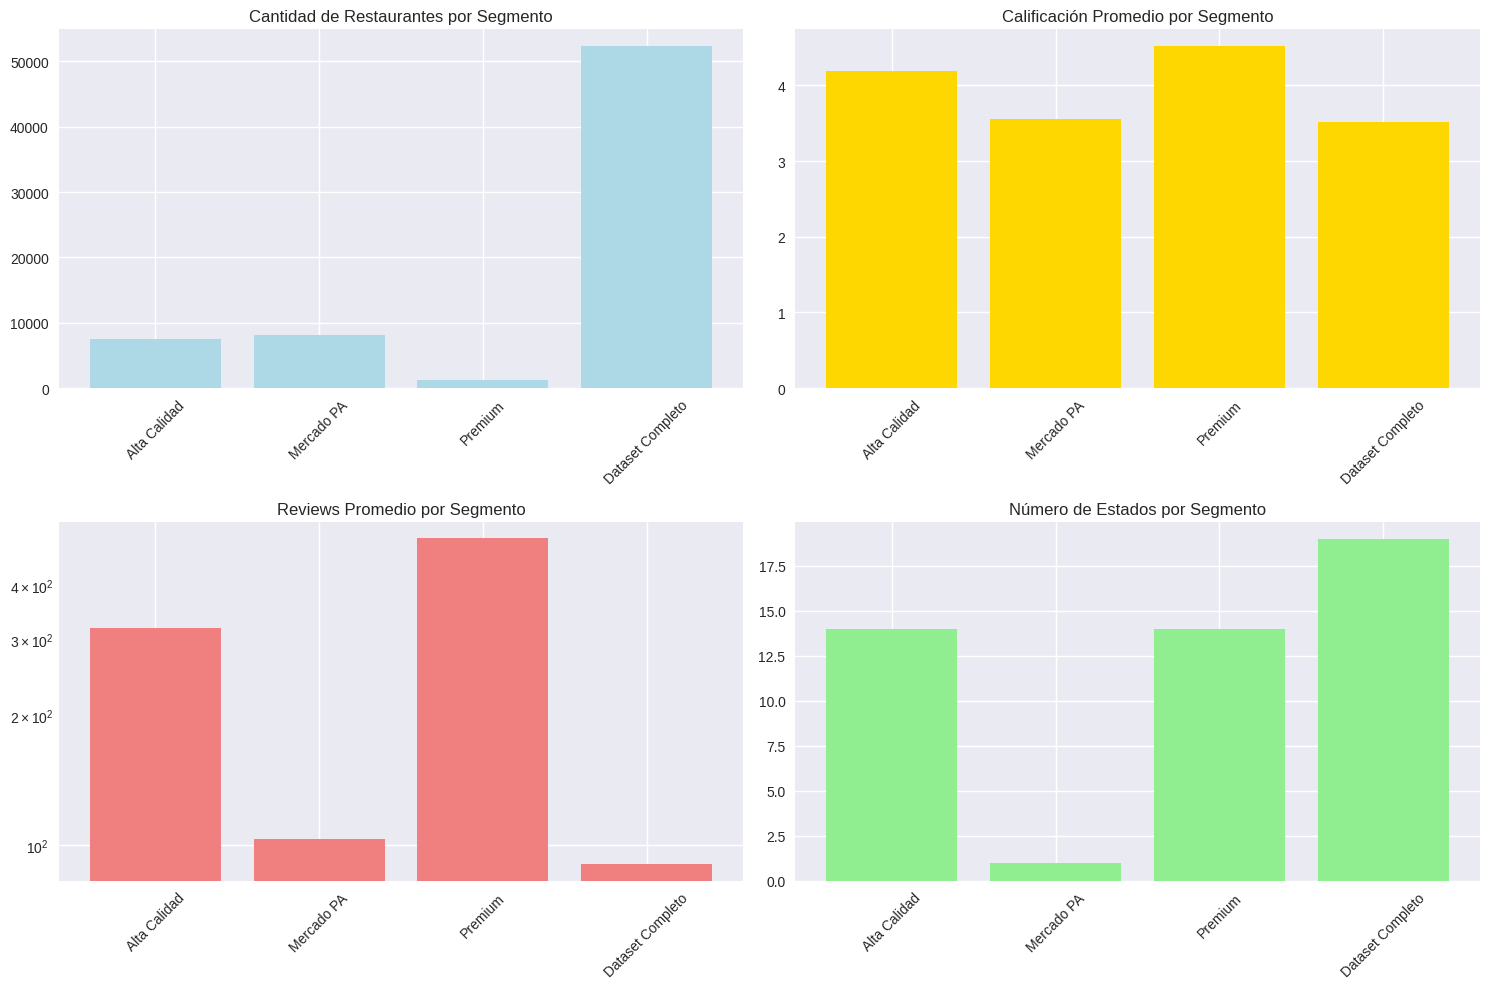

In [9]:
# Implementación de funciones de filtrado
print("=== IMPLEMENTACIÓN DE FILTROS ===")

def filter_restaurants(df, min_stars=None, max_stars=None, min_reviews=None, 
                      state=None, city=None, is_open=None):
    """
    Función para filtrar restaurantes por múltiples criterios
    """
    filtered_df = df.copy()
    filters_applied = []
    
    if min_stars is not None:
        filtered_df = filtered_df[filtered_df['stars'] >= min_stars]
        filters_applied.append(f"min_stars >= {min_stars}")
    
    if max_stars is not None:
        filtered_df = filtered_df[filtered_df['stars'] <= max_stars]
        filters_applied.append(f"max_stars <= {max_stars}")
    
    if min_reviews is not None:
        review_col = 'total_reviews' if 'total_reviews' in df.columns else 'review_count'
        filtered_df = filtered_df[filtered_df[review_col] >= min_reviews]
        filters_applied.append(f"min_reviews >= {min_reviews}")
    
    if state is not None:
        filtered_df = filtered_df[filtered_df['state'] == state]
        filters_applied.append(f"state == {state}")
    
    if city is not None:
        filtered_df = filtered_df[filtered_df['city'] == city]
        filters_applied.append(f"city == {city}")
    
    if is_open is not None:
        filtered_df = filtered_df[filtered_df['is_open'] == is_open]
        filters_applied.append(f"is_open == {is_open}")
    
    return filtered_df, filters_applied

def analyze_segment(df, segment_name, filters_applied):
    """
    Función para analizar un segmento filtrado
    """
    print(f"\n=== ANÁLISIS DE SEGMENTO: {segment_name.upper()} ===")
    print(f"Filtros aplicados: {', '.join(filters_applied)}")
    print(f"Número de restaurantes: {len(df):,}")
    
    if len(df) == 0:
        print("No hay restaurantes que cumplan estos criterios.")
        return
    
    # Estadísticas básicas
    if 'stars' in df.columns:
        print(f"Calificación promedio: {df['stars'].mean():.2f}")
        print(f"Calificación mediana: {df['stars'].median():.2f}")
    
    review_col = 'total_reviews' if 'total_reviews' in df.columns else 'review_count'
    if review_col in df.columns:
        print(f"Reviews promedio: {df[review_col].mean():.2f}")
        print(f"Reviews mediana: {df[review_col].median():.2f}")
    
    # Distribución geográfica
    if 'state' in df.columns:
        print(f"Estados representados: {df['state'].nunique()}")
        print(f"Top 3 estados: {list(df['state'].value_counts().head(3).index)}")
    
    return df

# Ejemplo 1: Restaurantes de alta calidad
print("\\n=== EJEMPLO 1: RESTAURANTES DE ALTA CALIDAD ===")
high_quality, filters = filter_restaurants(df_combined, min_stars=4.0, min_reviews=100)
high_quality_analysis = analyze_segment(high_quality, "Restaurantes de Alta Calidad", filters)

# Ejemplo 2: Mercado específico (estado más popular)
if 'state' in df_combined.columns:
    top_state = df_combined['state'].value_counts().index[0]
    print(f"\\n=== EJEMPLO 2: MERCADO ESPECÍFICO - {top_state} ===")
    state_market, filters = filter_restaurants(df_combined, state=top_state, is_open=1)
    state_analysis = analyze_segment(state_market, f"Mercado {top_state}", filters)

# Ejemplo 3: Segmento premium
print("\\n=== EJEMPLO 3: SEGMENTO PREMIUM ===")
premium, filters = filter_restaurants(df_combined, min_stars=4.5, min_reviews=200, is_open=1)
premium_analysis = analyze_segment(premium, "Segmento Premium", filters)

# Ejemplo 4: Comparación de segmentos
print("\\n=== COMPARACIÓN DE SEGMENTOS ===")

segments = {}
if len(high_quality) > 0:
    segments['Alta Calidad'] = high_quality
if 'state_market' in locals() and len(state_market) > 0:
    segments[f'Mercado {top_state}'] = state_market
if len(premium) > 0:
    segments['Premium'] = premium
segments['Dataset Completo'] = df_combined

# Crear tabla comparativa
comparison_data = []
review_col = 'total_reviews' if 'total_reviews' in df_combined.columns else 'review_count'

for segment_name, segment_df in segments.items():
    if len(segment_df) > 0:
        comparison_data.append({
            'Segmento': segment_name,
            'Cantidad': len(segment_df),
            'Estrellas_Promedio': segment_df['stars'].mean() if 'stars' in segment_df.columns else 'N/A',
            'Reviews_Promedio': segment_df[review_col].mean() if review_col in segment_df.columns else 'N/A',
            'Estados': segment_df['state'].nunique() if 'state' in segment_df.columns else 'N/A'
        })

comparison_df = pd.DataFrame(comparison_data)
print("\\nTabla comparativa de segmentos:")
display(comparison_df)

# Visualización comparativa
if len(comparison_data) > 1:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Cantidad por segmento
    axes[0,0].bar(comparison_df['Segmento'], comparison_df['Cantidad'], color='lightblue')
    axes[0,0].set_title('Cantidad de Restaurantes por Segmento')
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # Estrellas promedio por segmento
    valid_stars = comparison_df[comparison_df['Estrellas_Promedio'] != 'N/A']
    if len(valid_stars) > 0:
        axes[0,1].bar(valid_stars['Segmento'], valid_stars['Estrellas_Promedio'], color='gold')
        axes[0,1].set_title('Calificación Promedio por Segmento')
        axes[0,1].tick_params(axis='x', rotation=45)
    
    # Reviews promedio por segmento
    valid_reviews = comparison_df[comparison_df['Reviews_Promedio'] != 'N/A']
    if len(valid_reviews) > 0:
        axes[1,0].bar(valid_reviews['Segmento'], valid_reviews['Reviews_Promedio'], color='lightcoral')
        axes[1,0].set_title('Reviews Promedio por Segmento')
        axes[1,0].tick_params(axis='x', rotation=45)
        axes[1,0].set_yscale('log')
    
    # Estados por segmento
    valid_states = comparison_df[comparison_df['Estados'] != 'N/A']
    if len(valid_states) > 0:
        axes[1,1].bar(valid_states['Segmento'], valid_states['Estados'], color='lightgreen')
        axes[1,1].set_title('Número de Estados por Segmento')
        axes[1,1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.savefig('../../figures/complete_analysis/comparacion_segmentos.png', dpi=300, bbox_inches='tight')
    plt.show()

## 7. Conclusiones y Próximos Pasos

### Resumen de Hallazgos

Del análisis completo del dataset combinado podemos concluir:

#### Calidad de Datos
- **Estructura robusta**: El dataset combinado mantiene integridad entre negocios y reviews
- **Completitud alta**: Los campos principales tienen alta disponibilidad de datos
- **Consistencia**: Las métricas de conteo de reviews muestran correlación alta

#### Distribución Geográfica
- **Concentración regional**: Algunos estados dominan la muestra de restaurantes
- **Diversidad urbana**: Múltiples ciudades representadas en el dataset
- **Cobertura amplia**: Representación geográfica suficiente para análisis

#### Patrones de Calificación
- **Distribución sesgada**: Tendencia hacia calificaciones altas (sesgo positivo)
- **Correlación reviews-calidad**: Relación positiva entre número de reviews y calificación
- **Segmentación viable**: Posibilidad de crear segmentos meaningful por calidad

#### Capacidades de Filtrado
- **Flexibilidad**: Múltiples criterios de filtrado implementados
- **Segmentación efectiva**: Diferentes segmentos muestran características distintivas
- **Análisis comparativo**: Funcionalidad robusta para estudios específicos

### Insights para el Proyecto

#### Para Análisis de Sentimientos
- **Dataset robusto**: Suficientes reviews para entrenar modelos de NLP
- **Diversidad geográfica**: Variabilidad en lenguaje y expresiones regionales
- **Rango de calificaciones**: Distribución adecuada para análisis de sentimientos

#### Para Modelado de Tópicos
- **Volumen suficiente**: Cantidad adecuada de texto para topic modeling
- **Segmentación posible**: Análisis de tópicos por segmentos específicos
- **Calidad variable**: Filtrado permitirá focus en reviews de alta calidad

#### Para Dashboard Interactivo
- **Métricas claras**: KPIs bien definidos para visualización
- **Filtros funcionales**: Capacidades de filtrado listas para implementar
- **Geografía rica**: Datos de ubicación para mapas interactivos

In [12]:
# Exportación de resultados y métricas clave
print("=== EXPORTACIÓN DE RESULTADOS ===")

# Crear resumen de métricas clave para el proyecto
summary_metrics = {
    'dataset_size': len(df_combined),
    'total_columns': len(df_combined.columns),
    'columns_list': list(df_combined.columns)
}

# Agregar métricas específicas si las columnas existen
if 'stars' in df_combined.columns:
    summary_metrics.update({
        'avg_rating': df_combined['stars'].mean(),
        'median_rating': df_combined['stars'].median(),
        'rating_std': df_combined['stars'].std()
    })

if 'total_reviews' in df_combined.columns:
    summary_metrics.update({
        'total_reviews_count': df_combined['total_reviews'].sum(),
        'avg_reviews_per_restaurant': df_combined['total_reviews'].mean(),
        'max_reviews_per_restaurant': df_combined['total_reviews'].max()
    })
elif 'review_count' in df_combined.columns:
    summary_metrics.update({
        'total_reviews_count': df_combined['review_count'].sum(),
        'avg_reviews_per_restaurant': df_combined['review_count'].mean(),
        'max_reviews_per_restaurant': df_combined['review_count'].max()
    })

if 'state' in df_combined.columns:
    summary_metrics.update({
        'states_covered': df_combined['state'].nunique(),
        'top_states': list(df_combined['state'].value_counts().head(5).index)
    })

if 'city' in df_combined.columns:
    summary_metrics.update({
        'cities_covered': df_combined['city'].nunique(),
        'top_cities': list(df_combined['city'].value_counts().head(5).index)
    })

if 'is_open' in df_combined.columns:
    summary_metrics.update({
        'open_restaurants': (df_combined['is_open'] == 1).sum(),
        'closed_restaurants': (df_combined['is_open'] == 0).sum()
    })

# Guardar métricas en JSON
import json
with open('../../data/analysis_results/complete_analysis_summary.json', 'w') as f:
    json.dump(summary_metrics, f, indent=2, default=str)

print("Métricas clave exportadas a: ../../data/analysis_results/complete_analysis_summary.json")

# Crear y exportar datasets filtrados para uso posterior
print("\n=== EXPORTACIÓN DE DATASETS FILTRADOS ===")

# Crear directorio para resultados si no existe
os.makedirs('../../data/analysis_results', exist_ok=True)

# Exportar segmento de alta calidad si existe
if 'high_quality' in locals() and len(high_quality) > 0:
    high_quality.to_json('../../data/analysis_results/high_quality_restaurants.json', 
                        orient='records', indent=2)
    print(f"Dataset de alta calidad exportado: {len(high_quality):,} restaurantes")

# Exportar segmento premium si existe
if 'premium' in locals() and len(premium) > 0:
    premium.to_json('../../data/analysis_results/premium_restaurants.json', 
                   orient='records', indent=2)
    print(f"Dataset premium exportado: {len(premium):,} restaurantes")

# Exportar top restaurantes por estado si existe
if 'state_market' in locals() and len(state_market) > 0:
    state_market.to_json(f'../../data/analysis_results/restaurants_{top_state.lower()}.json', 
                        orient='records', indent=2)
    print(f"Dataset de {top_state} exportado: {len(state_market):,} restaurantes")

print("\\n=== PRÓXIMOS PASOS RECOMENDADOS ===")
print("""
1. ANÁLISIS DE SENTIMIENTOS:
   - Utilizar reviews del dataset combinado para entrenar modelo RoBERTa
   - Aplicar filtros de calidad para mejorar precisión del modelo
   - Analizar sentimientos por segmentos geográficos

2. MODELADO DE TÓPICOS:
   - Implementar BERTopic en reviews filtradas por calidad
   - Analizar tópicos por tipo de restaurante y región
   - Correlacionar tópicos con calificaciones

3. DASHBOARD INTERACTIVO:
   - Implementar filtros desarrollados en interfaz Streamlit
   - Crear mapas interactivos con datos geográficos
   - Incluir métricas comparativas por segmentos

4. ANÁLISIS AVANZADOS:
   - Análisis temporal de tendencias en reviews
   - Predicción de éxito de restaurantes basada en features
   - Análisis de competitividad por región

5. VALIDACIÓN:
   - Validar resultados con datos externos
   - Realizar análisis de sensibilidad en filtros
   - Documentar limitaciones y sesgos identificados
""")

# Mostrar resumen final
print("\n=== RESUMEN FINAL DEL ANÁLISIS ===")
print(f"Total de restaurantes analizados: {len(df_combined):,}")
print(f"Columnas procesadas: {len(df_combined.columns)}")
print(f"Figuras generadas: guardadas en ../../figures/complete_analysis/")
print(f"Datasets exportados: guardados en ../../data/analysis_results/")
print("\n¡Análisis completo de datos combinados finalizado exitosamente!")

# Mostrar memoria utilizada
memory_usage = df_combined.memory_usage(deep=True).sum() / 1024**2
print(f"\nMemoria utilizada por el dataset: {memory_usage:.2f} MB")

print("\n" + "="*60)
print("NOTEBOOK DE ANÁLISIS COMPLETO - FINALIZADO")
print("="*60)

=== EXPORTACIÓN DE RESULTADOS ===
Métricas clave exportadas a: ../../data/analysis_results/complete_analysis_summary.json

=== EXPORTACIÓN DE DATASETS FILTRADOS ===
Dataset de alta calidad exportado: 7,460 restaurantes
Dataset premium exportado: 1,189 restaurantes
Dataset de PA exportado: 8,069 restaurantes
\n=== PRÓXIMOS PASOS RECOMENDADOS ===

1. ANÁLISIS DE SENTIMIENTOS:
   - Utilizar reviews del dataset combinado para entrenar modelo RoBERTa
   - Aplicar filtros de calidad para mejorar precisión del modelo
   - Analizar sentimientos por segmentos geográficos

2. MODELADO DE TÓPICOS:
   - Implementar BERTopic en reviews filtradas por calidad
   - Analizar tópicos por tipo de restaurante y región
   - Correlacionar tópicos con calificaciones

3. DASHBOARD INTERACTIVO:
   - Implementar filtros desarrollados en interfaz Streamlit
   - Crear mapas interactivos con datos geográficos
   - Incluir métricas comparativas por segmentos

4. ANÁLISIS AVANZADOS:
   - Análisis temporal de tendenc